In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd

from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from aif360.sklearn.postprocessing import RejectOptionClassifierCV, PostProcessingMeta
from aif360.sklearn.datasets import fetch_adult

In [2]:
X, y, sample_weight = fetch_adult()

In [3]:
X.index = pd.MultiIndex.from_arrays(X.index.codes, names=X.index.names)
y.index = pd.MultiIndex.from_arrays(y.index.codes, names=y.index.names)
y = pd.Series(y.factorize(sort=True)[0], index=y.index)
X = pd.get_dummies(X)

In [4]:
metric = 'statistical_parity'
pp = PostProcessingMeta(LogisticRegression(solver='lbfgs'),
        RejectOptionClassifierCV('sex', scoring=metric, step=0.02, n_jobs=-1))
pp.fit(X, y)
pp.postprocessor_.best_params_

{'margin': 0.16, 'prot_attr': 'sex', 'threshold': 0.24}

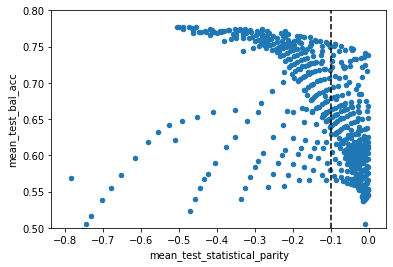

In [6]:
res = pd.DataFrame(pp.postprocessor_.cv_results_)
ax = res.plot.scatter('mean_test_'+metric, 'mean_test_bal_acc')
res.loc[[pp.postprocessor_.best_index_]].plot.scatter('mean_test_'+metric, 'mean_test_bal_acc', color='r', ax=ax)
plt.plot([-0.1, -0.1], [0, 1], '--k')
plt.ylim([0.5, 0.8])
plt.show()

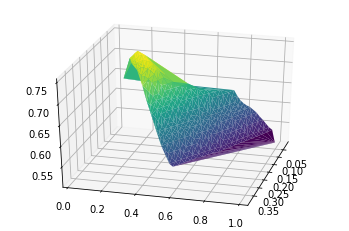

In [8]:
ax = plt.gca(projection='3d')
res_fair = res.loc[res['mean_test_'+metric] > -0.1]
surf = ax.plot_trisurf(res_fair.param_margin, res_fair.param_threshold, res_fair.mean_test_bal_acc, cmap='viridis')
ax.view_init(30, 15)
plt.show()